Eksik veriler:
 Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64


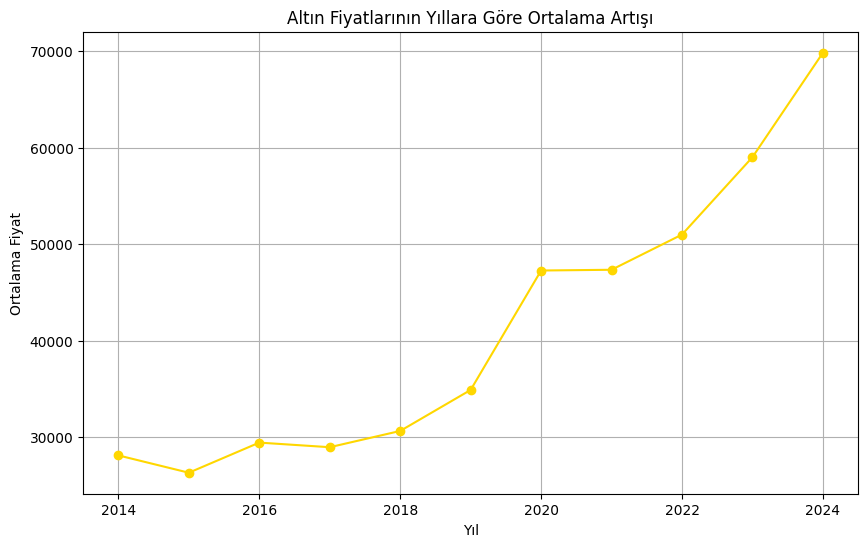

Özellik Önemleri:
   Feature  Importance
2     Low    0.325788
1    High    0.322344
0    Open    0.212451
4    Year    0.124211
3  Volume    0.008004
6     Day    0.003641
5   Month    0.003562
Seçilen özellikler: ['Low', 'High', 'Open', 'Year', 'Volume']
Karar Ağacı: Eğitim Doğruluğu = 0.9933, Test Doğruluğu = 0.9875
Lojistik Regresyon: Eğitim Doğruluğu = 0.9719, Test Doğruluğu = 0.9822
Naive Bayes: Eğitim Doğruluğu = 0.8877, Test Doğruluğu = 0.8897
KNN: Eğitim Doğruluğu = 0.9755, Test Doğruluğu = 0.9733
SVM: Eğitim Doğruluğu = 0.9608, Test Doğruluğu = 0.9662
Rastgele Orman: Eğitim Doğruluğu = 0.9929, Test Doğruluğu = 0.9947
Yapay Sinir Ağı: Eğitim Doğruluğu = 0.9791, Test Doğruluğu = 0.9911

Model Performans Karşılaştırması:
                Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0         Karar Ağacı        0.993316       0.987544   0.987796  0.987544   
1  Lojistik Regresyon        0.971925       0.982206   0.982349  0.982206   
2         Naive Bayes        0.

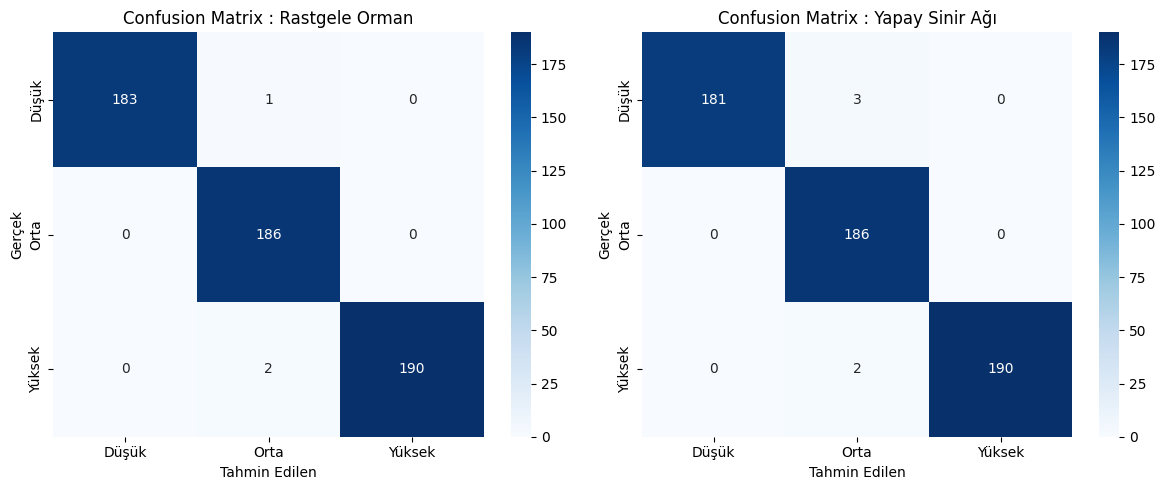

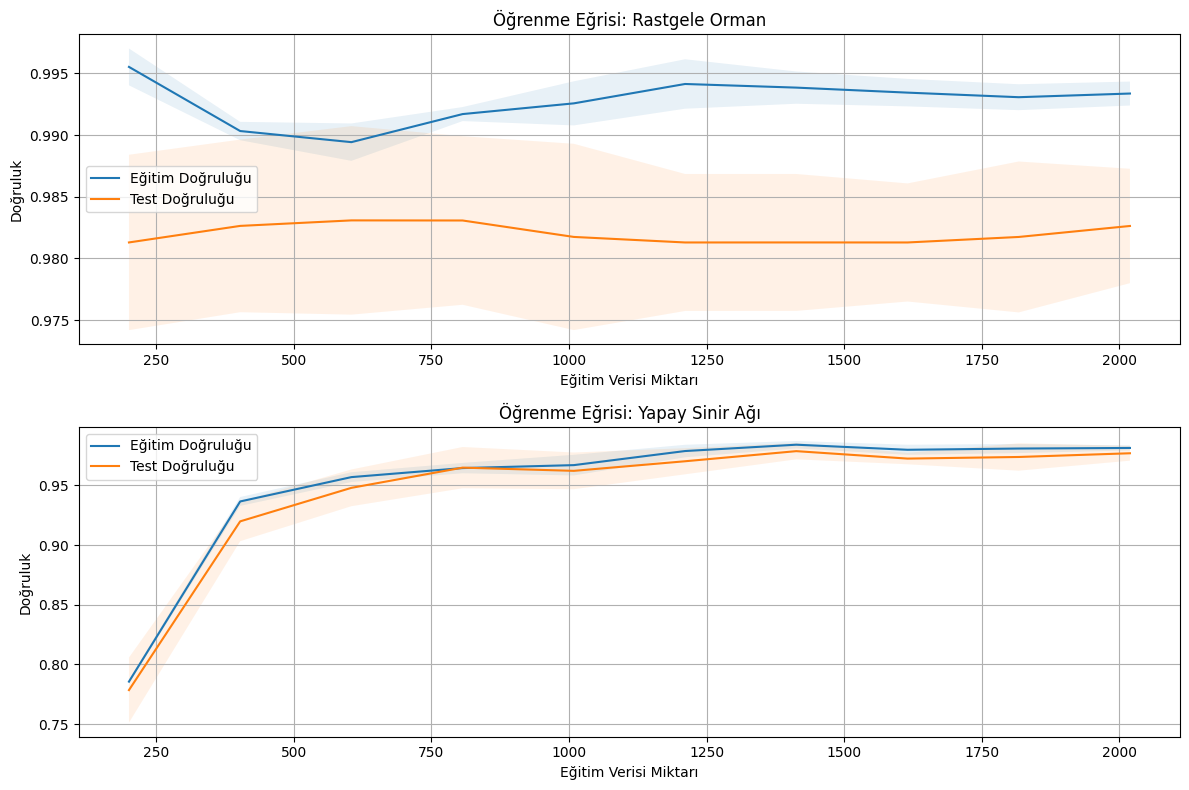


Rastgele Orman ile test seti üzerinde örnek tahminler:
Örnek 1: Tarih: 2023-12-05, Tahmin Edilen Fiyat Sınıfı = Yüksek
Örnek 2: Tarih: 2024-04-26, Tahmin Edilen Fiyat Sınıfı = Yüksek
Örnek 3: Tarih: 2020-02-06, Tahmin Edilen Fiyat Sınıfı = Orta
Örnek 4: Tarih: 2023-09-06, Tahmin Edilen Fiyat Sınıfı = Yüksek
Örnek 5: Tarih: 2021-02-17, Tahmin Edilen Fiyat Sınıfı = Orta


In [27]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd  # Veri manipülasyonu için (örneğin, veri setini yükleme)
import numpy as np  # Sayısal işlemler için
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve  # Veriyi bölme, çapraz doğrulama ve öğrenme eğrisi
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Özellik normalleştirme ve sınıf kodlama
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Performans metrikleri
from sklearn.tree import DecisionTreeClassifier  # Karar Ağacı modeli
from sklearn.linear_model import LogisticRegression  # Lojistik Regresyon modeli
from sklearn.naive_bayes import GaussianNB  # Naive Bayes modeli
from sklearn.neighbors import KNeighborsClassifier  # K-En Yakın Komşu modeli
from sklearn.svm import SVC  # Destek Vektör Makineleri modeli
from sklearn.ensemble import RandomForestClassifier  # Rastgele Orman modeli
from sklearn.neural_network import MLPClassifier  # Yapay Sinir Ağı modeli
import matplotlib.pyplot as plt  # Grafik çizimi için
import seaborn as sns  # Görselleştirme için
from datetime import datetime  # Tarih işlemleri için
import warnings  # Uyarıları bastırmak için
warnings.filterwarnings('ignore')  # Gereksiz uyarıları gizler

# Veri setini yükleme
data = pd.read_csv('GoldPrice.csv')  # Gold Price.csv dosyasını yükler (günlük altın fiyatları)

# Eksik verileri kontrol etme ve işleme
print("Eksik veriler:\n", data.isnull().sum())  # Her sütundaki eksik veri sayısını yazdırır
data.fillna(method='ffill', inplace=True)  # Eksik verileri bir önceki değerle doldurur

# Tarihe göre sıralama
data['Date'] = pd.to_datetime(data['Date'])  # Date sütununu tarih formatına çevirir
data.sort_values('Date', inplace=True)  # Veriyi tarihe göre sıralar (eski tarihten yeniye)
data.reset_index(drop=True, inplace=True)  # İndeksleri sıfırlar

# Özellik mühendisliği: Tarih özelliklerini çıkarma
data['Year'] = data['Date'].dt.year  # Tarihten yılı çıkarır
data['Month'] = data['Date'].dt.month  # Tarihten ayı çıkarır
data['Day'] = data['Date'].dt.day  # Tarihten günü çıkarır

# Altın fiyatlarının yıllara göre artışını görselleştirme
yearly_price = data.groupby('Year')['Price'].mean().reset_index()  # Her yıl için ortalama fiyatı hesaplar
plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarlar
plt.plot(yearly_price['Year'], yearly_price['Price'], marker='o', linestyle='-', color='gold')  # Çizgi grafiği çizer
plt.title('Altın Fiyatlarının Yıllara Göre Ortalama Artışı')  # Başlık ekler
plt.xlabel('Yıl')  # X ekseni etiketi
plt.ylabel('Ortalama Fiyat')  # Y ekseni etiketi
plt.grid(True)  # Izgara ekler
plt.savefig('yearly_price_trend.png')  # Grafiği kaydeder
plt.show()  # Grafiği gösterir

# Özellik seçimi: Open, High, Low, Volume ve tarih özellikleri
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']  # Modelin kullanacağı özellikler
X = data[features]  # Özellikleri veri setinden seçer

# Hedef değişkeni (Price) sınıflara ayırma: Düşük, Orta, Yüksek
data['Price_Class'] = pd.qcut(data['Price'], q=3, labels=['Düşük', 'Orta', 'Yüksek'])  # Fiyatları 3 eşit dilime böler
y = data['Price_Class']  # Hedef değişkeni (sınıflar) seçer

# Hedef değişkeni kodlama
le = LabelEncoder()  # Sınıfları (Düşük, Orta, Yüksek) sayısal değerlere çevirir
y = le.fit_transform(y)  # Sınıfları kodlar (örneğin, Düşük=0, Orta=1, Yüksek=2)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # %80 eğitim, %20 test
# random_state=42 tekrarlanabilirlik sağlar

# Test setindeki tarihleri saklama
test_indices = X_test.index  # Test setindeki satırların indekslerini alır
test_dates = data.loc[test_indices, 'Date']  # Test setindeki tarihleri çeker

# Özellikleri normalleştirme
scaler = StandardScaler()  # Özellikleri standartlaştırır (ortalama=0, standart sapma=1)
X_train = scaler.fit_transform(X_train)  # Eğitim verisini normalleştirir
X_test = scaler.transform(X_test)  # Test verisini aynı ölçekle normalleştirir

# Özellik önemlerini hesaplamak için Rastgele Orman modeli
rf_for_feature_importance = RandomForestClassifier(random_state=42, n_estimators=100)  # Özellik önemleri için model
rf_for_feature_importance.fit(X_train, y_train)  # Modeli eğitir
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_for_feature_importance.feature_importances_
}).sort_values(by='Importance', ascending=False)  # Özellik önemlerini sıralar
print("Özellik Önemleri:\n", feature_importances)  # Özellik önemlerini yazdırır

# En önemli 5 özelliği seçme (aşırı öğrenmeyi azaltmak için)
top_features = feature_importances['Feature'].head(5).tolist()  # En önemli 5 özelliği alır
X_train = X_train[:, [features.index(f) for f in top_features]]  # Eğitim verisinden bu özellikleri seçer
X_test = X_test[:, [features.index(f) for f in top_features]]  # Test verisinden bu özellikleri seçer
print("Seçilen özellikler:", top_features)  # Seçilen özellikleri yazdırır

# Değerlendirilecek modelleri tanımlama (hiperparametrelerle aşırı öğrenmeyi azaltma)
models = {
    'Karar Ağacı': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10),  # Karmaşıklığı sınırlar
    'Lojistik Regresyon': LogisticRegression(random_state=42, max_iter=1000),  # Basit model
    'Naive Bayes': GaussianNB(),  # Varsayılan ayarlar
    'KNN': KNeighborsClassifier(n_neighbors=5),  # Varsayılan ayarlar
    'SVM': SVC(random_state=42),  # Varsayılan ayarlar
    'Rastgele Orman': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10),  # Karmaşıklığı sınırlar
    'Yapay Sinir Ağı': MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100, 50), alpha=0.01)  # Düzenlileştirme ekler
}  # Modelleri bir sözlükte toplar

# Modelleri değerlendirme ve sonuçları saklama
results = []  # Performans sonuçlarını saklamak için liste
for name, model in models.items():  # Her modeli sırayla işler
    model.fit(X_train, y_train)  # Modeli eğitim verisiyle eğitir
    y_pred = model.predict(X_test)  # Test verisiyle tahmin yapar
    train_pred = model.predict(X_train)  # Eğitim verisiyle tahmin yapar (aşırı öğrenme kontrolü)
    train_accuracy = accuracy_score(y_train, train_pred)  # Eğitim doğruluğunu hesaplar
    test_accuracy = accuracy_score(y_test, y_pred)  # Test doğruluğunu hesaplar
    precision = precision_score(y_test, y_pred, average='weighted')  # Hassasiyet hesaplar
    recall = recall_score(y_test, y_pred, average='weighted')  # Geri çağırma hesaplar
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1-skoru hesaplar
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')  # 10 katlı çapraz doğrulama
    results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Accuracy': cv_scores.mean()
    })  # Sonuçları sözlüğe ekler
    print(f"{name}: Eğitim Doğruluğu = {train_accuracy:.4f}, Test Doğruluğu = {test_accuracy:.4f}")  # Eğitim ve test doğruluklarını yazdırır

# Sonuçları DataFrame'e çevirme
results_df = pd.DataFrame(results)  # Sonuçları tablo formatına çevirir
print("\nModel Performans Karşılaştırması:")  # Başlık yazdırır
print(results_df)  # Performans tablosunu yazdırır

# En iyi iki modeli seçme
top_models = results_df.nlargest(2, 'Test Accuracy')['Model'].values  # En yüksek test doğruluğuna sahip 2 modeli seçer
print("En iyi iki model:", top_models)  # En iyi modelleri yazdırır

# Confusion Matrix görselleştirme
plt.figure(figsize=(12, 5))  # Grafik boyutunu ayarlar
for i, model_name in enumerate(top_models, 1):  # En iyi modelleri döngüyle işler
    model = models[model_name]  # Modeli alır
    y_pred = model.predict(X_test)  # Test verisiyle tahmin yapar
    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix  hesaplar
    plt.subplot(1, 2, i)  # İki grafik için subplot oluşturur
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)  # Matrisi görselleştirir
    plt.title(f'Confusion Matrix : {model_name}')  # Başlık ekler
    plt.xlabel('Tahmin Edilen')  # X ekseni etiketi
    plt.ylabel('Gerçek')  # Y ekseni etiketi
plt.tight_layout()  # Grafik düzenini optimize eder
plt.savefig('confusion_matrices.png')  # Grafiği kaydeder
plt.show()  # Grafiği gösterir

# Öğrenme eğrisi grafiği (Rastgele Orman ve Yapay Sinir Ağı için)
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlar
for i, model_name in enumerate(['Rastgele Orman', 'Yapay Sinir Ağı'], 1):  # İki model için döngü
    model = models[model_name]  # Modeli alır
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))  # Öğrenme eğrisi verilerini hesaplar
    train_mean = np.mean(train_scores, axis=1)  # Eğitim doğruluklarının ortalamasını alır
    train_std = np.std(train_scores, axis=1)  # Eğitim doğruluklarının standart sapmasını alır
    test_mean = np.mean(test_scores, axis=1)  # Test doğruluklarının ortalamasını alır
    test_std = np.std(test_scores, axis=1)  # Test doğruluklarının standart sapmasını alır
    plt.subplot(2, 1, i)  # İki grafik için subplot oluşturur
    plt.plot(train_sizes, train_mean, label='Eğitim Doğruluğu')  # Eğitim eğrisini çizer
    plt.plot(train_sizes, test_mean, label='Test Doğruluğu')  # Test eğrisini çizer
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)  # Eğitim eğrisi için gölgelendirme
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)  # Test eğrisi için gölgelendirme
    plt.title(f'Öğrenme Eğrisi: {model_name}')  # Başlık ekler
    plt.xlabel('Eğitim Verisi Miktarı')  # X ekseni etiketi
    plt.ylabel('Doğruluk')  # Y ekseni etiketi
    plt.legend(loc='best')  # Lejand ekler
    plt.grid(True)  # Izgara ekler
plt.tight_layout()  # Grafik düzenini optimize eder
plt.savefig('learning_curves.png')  # Grafiği kaydeder
plt.show()  # Grafiği gösterir

# En iyi modelle test seti üzerinde örnek tahminler
best_model_name = top_models[0]  # En iyi modeli seçer
best_model = models[best_model_name]  # Modeli alır
sample_data = X_test[:5]  # Test setinden ilk 5 satırı alır
sample_pred = best_model.predict(sample_data)  # Bu satırlar için tahmin yapar
sample_pred_labels = le.inverse_transform(sample_pred)  # Tahminleri metne çevirir
print(f"\n{best_model_name} ile test seti üzerinde örnek tahminler:")  # Başlık yazdırır
for i, (pred, date) in enumerate(zip(sample_pred_labels, test_dates[:5])):  # Tahmin ve tarihleri eşleştirir
    print(f"Örnek {i+1}: Tarih: {date.strftime('%Y-%m-%d')}, Tahmin Edilen Fiyat Sınıfı = {pred}")  # Tahminleri yazdırır

# Sonuçları raporda kullanmak için kaydetme
results_df.to_csv('model_performance.csv', index=False)  # Performans tablosunu CSV olarak kaydeder